# GDC Data evaluation

## Cancer total

select y, count(*), sum(sim), sum(p), sum(lpr), sum(mr), sum(a), sum(n), sum(m), sum(k), sum(l), sum(pc), sum(b), sum(s), sum(sim)+sum(p)+sum(lpr)+sum(mr)+sum(a)+sum(n)+sum(m)+sum(k)+sum(l)+sum(pc)+sum(b)+sum(s) from (select d.year_of_diagnosis as y, c."gene.SIM1" as sim, c."gene.POMC" as p, c."gene.LEPR" as lpr, c."gene.MRAP2" as mr, c."gene.ADCY3" as a, c."gene.NTRK2" as n, c."gene.MC4R" as m, c."gene.KSR2" as k, c."gene.LEP" as l, c."gene.PCSK1" as pc, c."gene.BDNF" as b, c."gene.SH2B1" as s from cases c, diagnoses d where c.id = d.case_id) group by y;

-> count over years = 1351 = nr of diagnoses with country Of Residence at Enrollment = united states

select count(*) from cases where cases."gene.SIM1" = '1' or cases."gene.POMC" = 1 or  cases."gene.LEPR" ='1' or cases."gene.MRAP2" = 1 or cases."gene.ADCY3" = 1 or cases."gene.NTRK2" = 1 or cases."gene.MC4R"  = 1 or cases."gene.KSR2" = 1 or cases."gene.LEP" = 1 or cases."gene.PCSK1"  = 1 or cases."gene.BDNF"  =1 or  cases."gene.SH2B1" = 1;

-> diagnoses with one or more genes of obesity: 558

Query:  
- group by diagnosis.year_of_diagnosis 

In [1]:
import os
import sqlalchemy
import pandas as pd
from pathlib import Path
import numpy as np 
import matplotlib as mpl
#import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
#print(os.getcwd())

In [34]:
# Connect to the database using SQLAlchemy

# sqlite://<nohostname>/<path>
# where <path> is relative:
dbEngine=sqlalchemy.create_engine('sqlite:///../../data/gdc.sqlite')
with dbEngine.connect() as conn:
    sqlstatement_obese = "select year_of_diagnosis, count(*) as c from diagnoses group by year_of_diagnosis"
    gdc = pd.read_sql_query(sqlstatement_obese, conn)
    gdc['year_of_diagnosis'] = gdc['year_of_diagnosis'].astype(int)
    gdc = gdc.set_index('year_of_diagnosis')
print(gdc.dtypes)
print(gdc)

c    int64
dtype: object
                     c
year_of_diagnosis     
2004                 5
2005                77
2006               118
2007               142
2008               101
2009               209
2010               133
2011               188
2012               177
2013               201


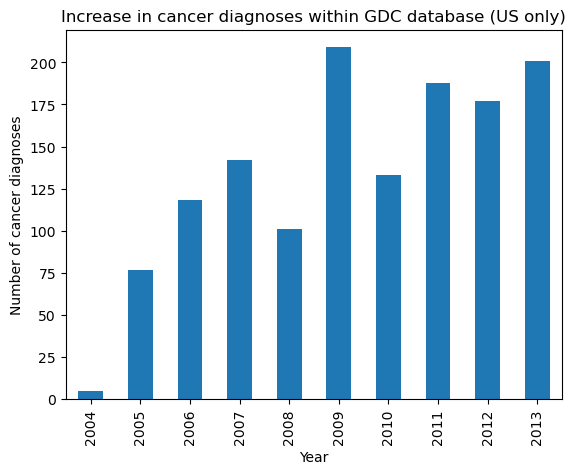

In [35]:
ax = gdc['c'].plot(kind='bar')
ax.set(xlabel='Year', ylabel='Number of cancer diagnoses', title='Increase in cancer diagnoses within GDC database (US only)');

**Elaboration**
Cancer diagnoses in the GDC NCI Genomic Data Commons are increasing for the subset marked as 
- country of residence at enrollment for the study: United States

This could come from increasing numbers of submitters and submissions and/or due to increasing numbers of diagnoses.

## Cancer by age ranges

age ranges are not possible with the data in GDC since the range of age for cancer diagnoses are 
- max age 29
- number aged 18 and older within the gdc data for US = 3

Therefore open up GDC data to all or no definition on country of residence at enrollment with the constraint:
- the evaluation may not be valid based on the BRFSS data relating to US only
- Assumption: The inclusion of datasets from different countries will not change the evaluation





## Cancer by Genes causing or supporting obesity

select count(*) from cases where cases."gene.SIM1" = '1' or cases."gene.POMC" = 1 or  cases."gene.LEPR" ='1' or cases."gene.MRAP2" = 1 or cases."gene.ADCY3" = 1 or cases."gene.NTRK2" = 1 or cases."gene.MC4R"  = 1 or cases."gene.KSR2" = 1 or cases."gene.LEP" = 1 or cases."gene.PCSK1"  = 1 or cases."gene.BDNF"  =1 or  cases."gene.SH2B1" = 1;

correct: 558
see https://portal.gdc.cancer.gov/exploration?facetTab=genes&filters=%7B%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.demographic.country_of_residence_at_enrollment%22%2C%22value%22%3A%5B%22united%20states%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22genes.gene_id%22%2C%22value%22%3A%5B%22ENSG00000112246%22%2C%22ENSG00000115138%22%2C%22ENSG00000116678%22%2C%22ENSG00000135324%22%2C%22ENSG00000138031%22%2C%22ENSG00000148053%22%2C%22ENSG00000166603%22%2C%22ENSG00000171435%22%2C%22ENSG00000174697%22%2C%22ENSG00000175426%22%2C%22ENSG00000176697%22%2C%22ENSG00000178188%22%5D%7D%7D%5D%2C%22op%22%3A%22and%22%7D&searchTableTab=cases

